In [1]:
import pandas as pd

C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Read in rainfall data
df = pd.read_csv('NYC_Central_Park_weather_1869-2022.csv')

In [3]:
df

,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1869-01-01,0.75,9.0,NaN,19.0,29.0
1,1869-01-02,0.03,0.0,NaN,21.0,27.0
2,1869-01-03,0.00,0.0,NaN,27.0,35.0
3,1869-01-04,0.18,0.0,NaN,34.0,37.0
4,1869-01-05,0.05,0.0,NaN,37.0,43.0
...,...,...,...,...,...,...
56240,2022-12-25,0.00,0.0,0.0,14.0,28.0
56241,2022-12-26,0.00,0.0,0.0,18.0,29.0
56242,2022-12-27,0.00,0.0,0.0,29.0,35.0
56243,2022-12-28,0.00,0.0,0.0,33.0,47.0


In [4]:
#Drop unnecesary columns
cols = ['SNOW', 'SNWD', 'TMIN', 'TMAX']
df = df.drop(columns = cols)

In [5]:
df

,DATE,PRCP
0,1869-01-01,0.75
1,1869-01-02,0.03
2,1869-01-03,0.00
3,1869-01-04,0.18
4,1869-01-05,0.05
...,...,...
56240,2022-12-25,0.00
56241,2022-12-26,0.00
56242,2022-12-27,0.00
56243,2022-12-28,0.00


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df

,DATE,PRCP
0,1869-01-01,0.75
1,1869-01-02,0.03
2,1869-01-03,0.00
3,1869-01-04,0.18
4,1869-01-05,0.05
...,...,...
56240,2022-12-25,0.00
56241,2022-12-26,0.00
56242,2022-12-27,0.00
56243,2022-12-28,0.00


In [8]:
#To make life a little easier for us, we'll sum the rainfall each month and display the data monthly

# Set "Dates" as the index
df.set_index('DATE', inplace=True)

# Resample the data by month and sum the rainfall for each month
monthly_rainfall = df['PRCP'].resample('M').sum()

# Reset the index to include the month information
monthly_rainfall = monthly_rainfall.reset_index()

# Now 'Dates' column contains the start date of each month, and 'Lower Lee' column contains the total rainfall for each month
print(monthly_rainfall)
copy = monthly_rainfall #we'll save this for later

           DATE  PRCP
0    1869-01-31  2.53
1    1869-02-28  6.87
2    1869-03-31  4.61
3    1869-04-30  1.39
4    1869-05-31  4.15
...         ...   ...
1843 2022-08-31  1.71
1844 2022-09-30  4.10
1845 2022-10-31  5.08
1846 2022-11-30  3.15
1847 2022-12-31  5.55

[1848 rows x 2 columns]


C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\2794692529.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rainfall = df['PRCP'].resample('M').sum()


In [9]:
monthly_rainfall

,DATE,PRCP
0,1869-01-31,2.53
1,1869-02-28,6.87
2,1869-03-31,4.61
3,1869-04-30,1.39
4,1869-05-31,4.15
...,...,...
1843,2022-08-31,1.71
1844,2022-09-30,4.10
1845,2022-10-31,5.08
1846,2022-11-30,3.15


In [10]:
#Remove entries from before the year 2000
monthly_rainfall = monthly_rainfall[monthly_rainfall['DATE'].dt.year >= 2000]

monthly_rainfall

In [11]:
monthly_rainfall

,DATE,PRCP
1572,2000-01-31,3.23
1573,2000-02-29,1.66
1574,2000-03-31,3.34
1575,2000-04-30,3.53
1576,2000-05-31,4.50
...,...,...
1843,2022-08-31,1.71
1844,2022-09-30,4.10
1845,2022-10-31,5.08
1846,2022-11-30,3.15


In [12]:
monthly_rainfall['DATE'] = pd.to_datetime(monthly_rainfall['DATE']).dt.to_period('M')

C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\4047691539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall['DATE'] = pd.to_datetime(monthly_rainfall['DATE']).dt.to_period('M')


In [13]:
monthly_rainfall

,DATE,PRCP
1572,2000-01,3.23
1573,2000-02,1.66
1574,2000-03,3.34
1575,2000-04,3.53
1576,2000-05,4.50
...,...,...
1843,2022-08,1.71
1844,2022-09,4.10
1845,2022-10,5.08
1846,2022-11,3.15


In [14]:
#Convert precipitation from inches to millimeters
monthly_rainfall['PRCP'] = monthly_rainfall['PRCP'] * 25.4

C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\3236328444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall['PRCP'] = monthly_rainfall['PRCP'] * 25.4


In [15]:
monthly_rainfall

,DATE,PRCP
1572,2000-01,82.042
1573,2000-02,42.164
1574,2000-03,84.836
1575,2000-04,89.662
1576,2000-05,114.300
...,...,...
1843,2022-08,43.434
1844,2022-09,104.140
1845,2022-10,129.032
1846,2022-11,80.010


C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\853778479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall['DATE'] = monthly_rainfall['DATE'].dt.to_timestamp()


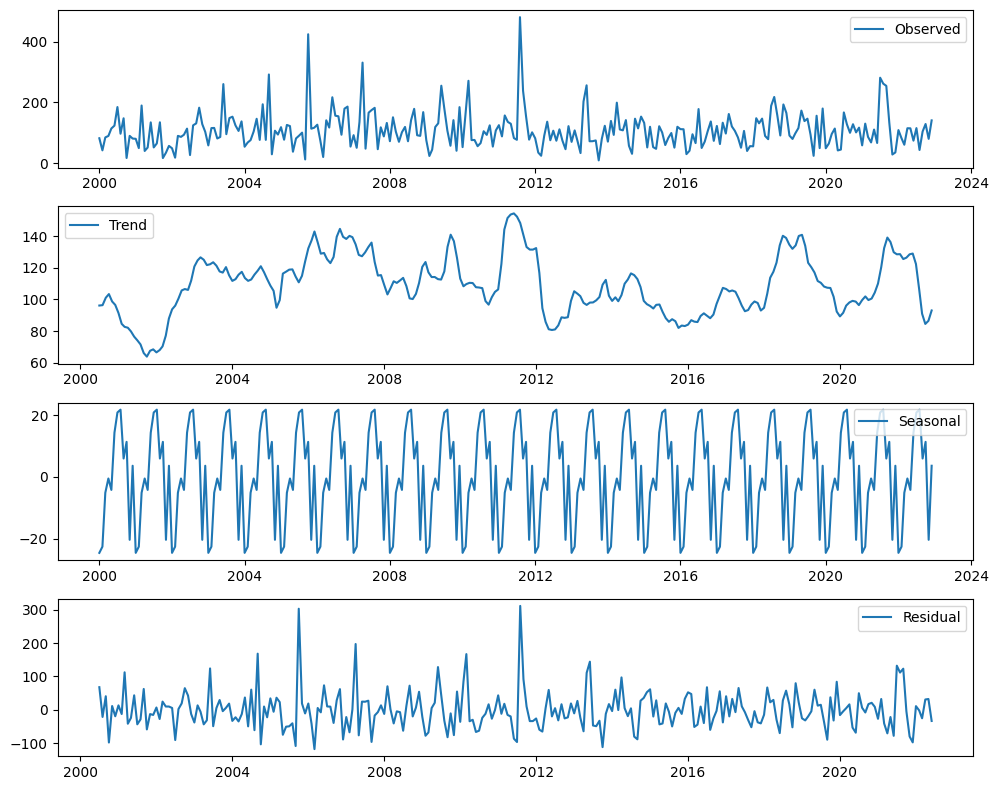

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


monthly_rainfall['DATE'] = monthly_rainfall['DATE'].dt.to_timestamp()
monthly_rainfall.set_index('DATE', inplace=True)


decomposition = seasonal_decompose(monthly_rainfall['PRCP'], period=12)

# Plotting each component separately
plt.figure(figsize=(10, 8))

# Plot the observed component
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
import pmdarima as pm

 

model = pm.auto_arima(monthly_rainfall['PRCP'], d=1, D=1,

                      m=12, trend='c', seasonal=True, 

                      start_p=0, start_q=0, max_order=6, test='adf',

                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3275.468, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3131.195, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3204.992, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3099.489, Time=2.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3162.041, Time=1.56 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3078.789, Time=2.47 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3116.551, Time=1.11 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=3067.480, Time=2.75 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=3102.3

In [18]:
train_x = monthly_rainfall[:int(0.85*(len(monthly_rainfall)))]

In [19]:
test_x = monthly_rainfall[int(0.85*(len(monthly_rainfall))):]

In [20]:
#Train the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_x['PRCP'],
                order=(2,1,0),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               PRCP   No. Observations:                  234
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1294.728
Date:                            Wed, 27 Mar 2024   AIC                           2599.456
Time:                                    17:03:06   BIC                           2616.446
Sample:                                01-01-2000   HQIC                          2606.316
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6485      0.068     -9.588      0.000      -0.781      -0.516
ar.L2         -0.3166      0.062     -5.099      0.000      -0.438      -0.195
ar.S.L12      -0.6823      0.051    -13.498      0.000      -0.781      -0.583
ar.S.L24      -0.3730      0.046     -8.139      0.000      -0.463      -0.283
sigma2      6946.6644    475.062     14.623      0.000    6015.560    7877.769
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):               106.29
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.78
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#Start forecasting
forecast_object = results.get_forecast(steps=len(test_x))

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

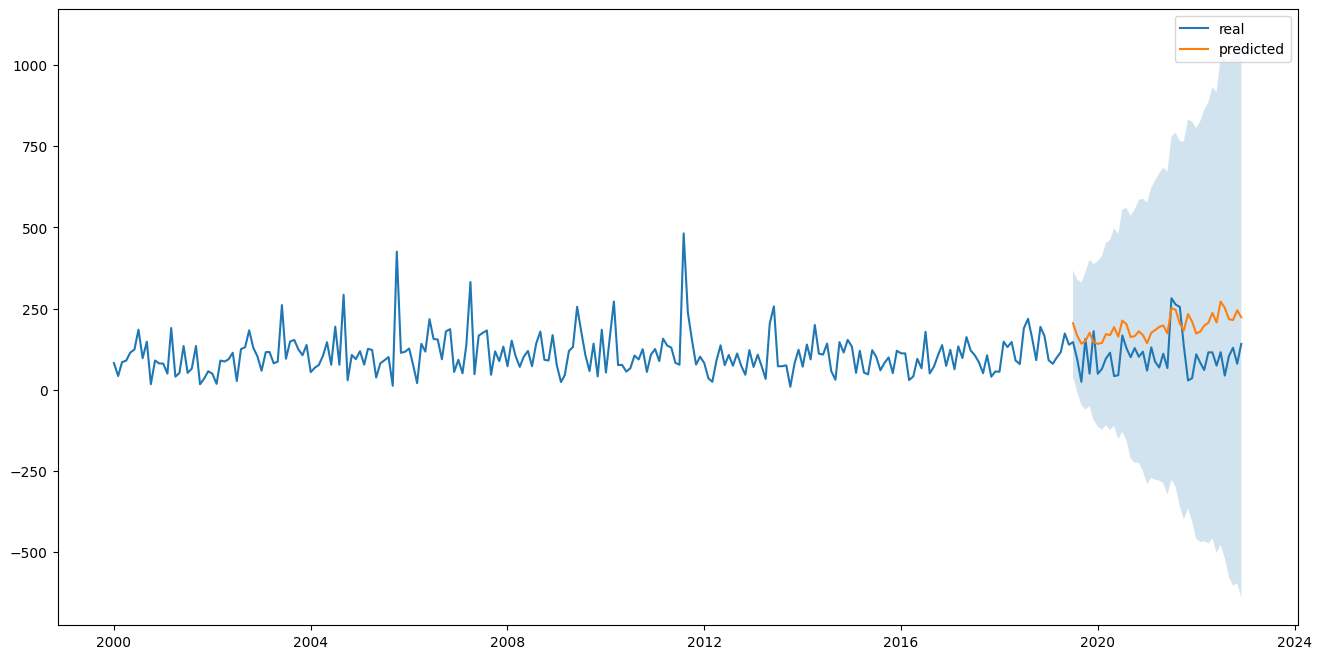

In [22]:
plt.figure(figsize=(16,8))

df = monthly_rainfall 

plt.plot(df.index, df['PRCP'], label='real')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],alpha=0.2)

plt.legend()
plt.show()

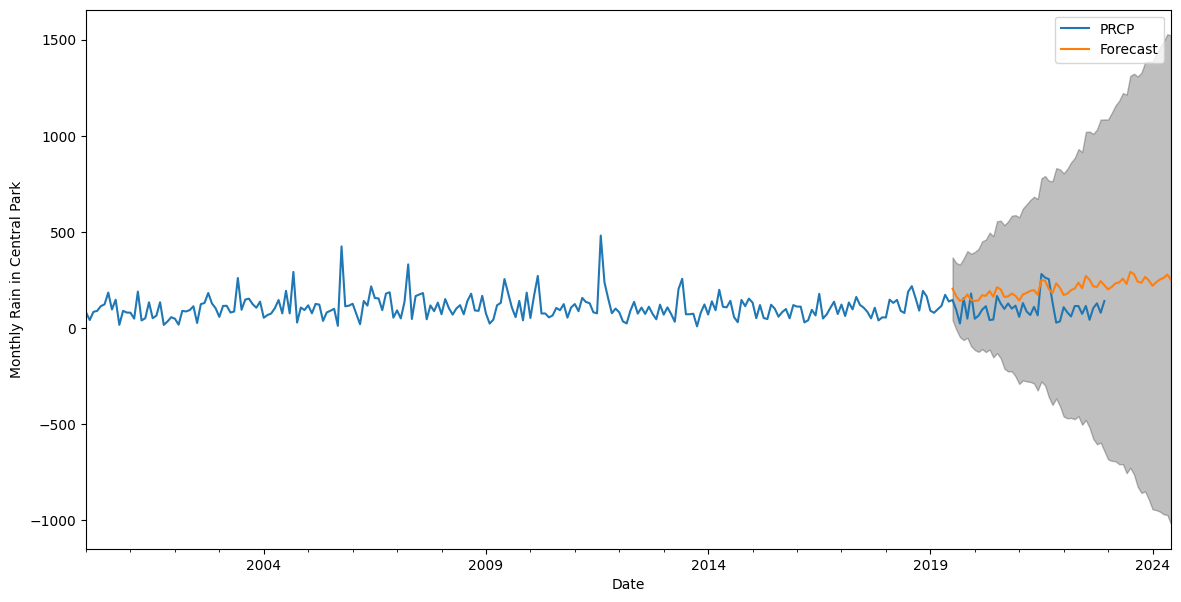

In [23]:
pred_f = results.get_forecast(steps=60)
pred_ci = pred_f.conf_int()
ax = df.plot(label='Rain', figsize=(14, 7))
pred_f.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Rain in Central Park')
plt.legend()
plt.show()

In [24]:
#To discover areas at risk of flooding we need elevation data
import requests
key = 'key was hidden, no stealing!'
r = requests.get('https://maps.googleapis.com/maps/api/elevation/json?locations=40.782561,-73.9655&key={}'.format(key))
r.json()

{'results': [{'elevation': 35.30291748046875,
   'location': {'lat': 40.782561, 'lng': -73.9655},
   'resolution': 19.08790397644043}],
 'status': 'OK'}

In [25]:
#Compare the rainfall to elevation, if the rainfall passes elevation, then the place is flooded

import json


r = requests.get('https://maps.googleapis.com/maps/api/elevation/json?locations=40.782561,-73.9655&key={}'.format(key))
json_data = r.json()

elevation = json_data['results'][0]['elevation']
print('Elevation:', elevation)


rainfall_dates = []
for index, value in mean.items():  # Use items() instead of iteritems()
    print('Date:', index)
    print('Predicted Rainfall:', value)
    print('Rainfall vs Elevation:', elevation - value)
    print('\n')
    rainfall_dates.append(index)


Elevation: 35.30291748046875
Date: 2019-07-01 00:00:00
Predicted Rainfall: 204.72295656728704
Rainfall vs Elevation: -169.4200390868183


Date: 2019-08-01 00:00:00
Predicted Rainfall: 165.91950377345242
Rainfall vs Elevation: -130.61658629298367


Date: 2019-09-01 00:00:00
Predicted Rainfall: 141.5858574798464
Rainfall vs Elevation: -106.28293999937765


Date: 2019-10-01 00:00:00
Predicted Rainfall: 149.9862029656345
Rainfall vs Elevation: -114.68328548516575


Date: 2019-11-01 00:00:00
Predicted Rainfall: 175.12624468118264
Rainfall vs Elevation: -139.8233272007139


Date: 2019-12-01 00:00:00
Predicted Rainfall: 146.723264919379
Rainfall vs Elevation: -111.42034743891026


Date: 2020-01-01 00:00:00
Predicted Rainfall: 141.21161516374585
Rainfall vs Elevation: -105.9086976832771


Date: 2020-02-01 00:00:00
Predicted Rainfall: 144.24456034694316
Rainfall vs Elevation: -108.94164286647441


Date: 2020-03-01 00:00:00
Predicted Rainfall: 171.0867155431872
Rainfall vs Elevation: -135.783798

In [26]:
diff_rain_ls = []
for f, b in zip(rainfall_dates, mean):
    print('Date:', f)
    print('Predicted Rainfall:', b)
    diff_rain = elevation - b
    diff_rain_ls.append(diff_rain)
    print('Rainfall vs elevation:', elevation - b)
    print('\n')
    # print(f, b)

Date: 2019-07-01 00:00:00
Predicted Rainfall: 204.72295656728704
Rainfall vs elevation: -169.4200390868183


Date: 2019-08-01 00:00:00
Predicted Rainfall: 165.91950377345242
Rainfall vs elevation: -130.61658629298367


Date: 2019-09-01 00:00:00
Predicted Rainfall: 141.5858574798464
Rainfall vs elevation: -106.28293999937765


Date: 2019-10-01 00:00:00
Predicted Rainfall: 149.9862029656345
Rainfall vs elevation: -114.68328548516575


Date: 2019-11-01 00:00:00
Predicted Rainfall: 175.12624468118264
Rainfall vs elevation: -139.8233272007139


Date: 2019-12-01 00:00:00
Predicted Rainfall: 146.723264919379
Rainfall vs elevation: -111.42034743891026


Date: 2020-01-01 00:00:00
Predicted Rainfall: 141.21161516374585
Rainfall vs elevation: -105.9086976832771


Date: 2020-02-01 00:00:00
Predicted Rainfall: 144.24456034694316
Rainfall vs elevation: -108.94164286647441


Date: 2020-03-01 00:00:00
Predicted Rainfall: 171.0867155431872
Rainfall vs elevation: -135.78379806271846


Date: 2020-04-01 0

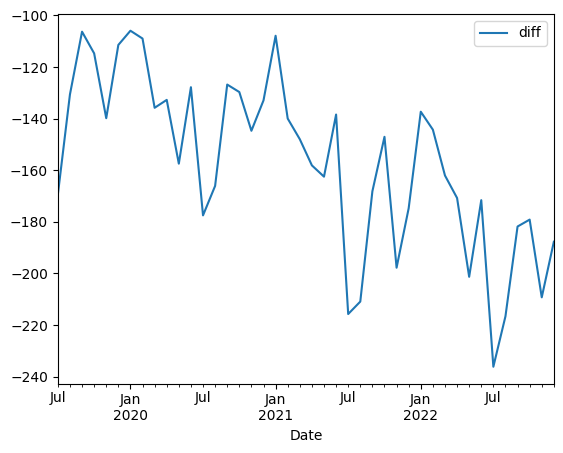

In [27]:
#Graph the difference in rainfall
df = pd.DataFrame(list(zip(rainfall_dates, diff_rain_ls)), 
               columns =['Date', 'diff']) 
df.plot(kind='line',x='Date',y='diff')
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train_x['PRCP'], order=(2, 1, 0))
results_arima = model_arima.fit()

C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


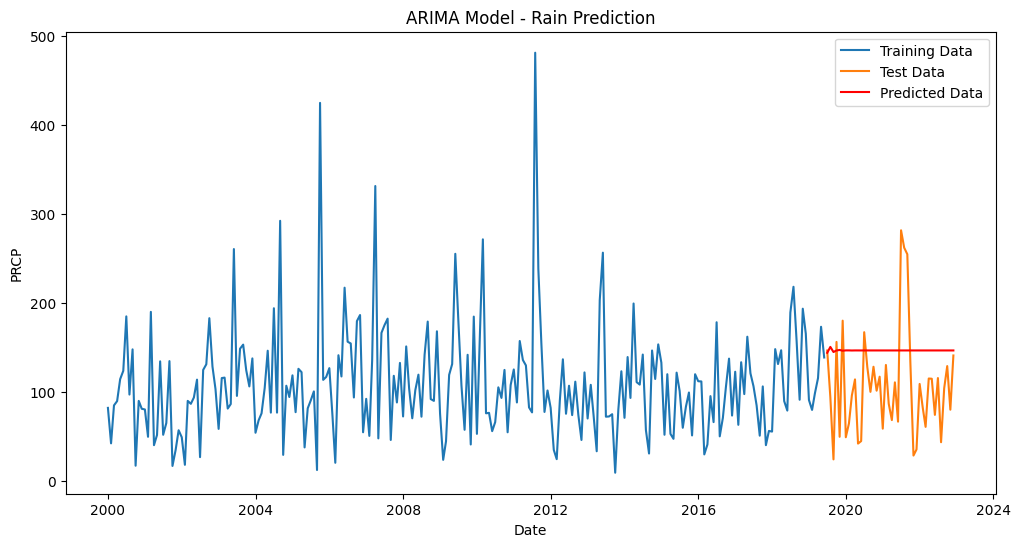

In [29]:
# Make predictions on the test set
predictions = results_arima.get_forecast(steps=len(test_x))
predicted_values = predictions.predicted_mean

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_x.index, train_x['PRCP'], label='Training Data')
plt.plot(test_x.index, test_x['PRCP'], label='Test Data')
plt.plot(test_x.index, predicted_values, color='red', label='Predicted Data')
plt.title('ARIMA Model - Rain Prediction')
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.legend()
plt.show()

In [ ]:
#ARIMA seemed to have a tough time getting accurate predictions (the red line), let's try tensorflow instead.

monthly_rainfall

In [30]:
monthly_rainfall

,PRCP
DATE,
2000-01-01,82.042
2000-02-01,42.164
2000-03-01,84.836
2000-04-01,89.662
2000-05-01,114.300
...,...
2022-08-01,43.434
2022-09-01,104.140
2022-10-01,129.032


In [31]:

# Reset index while preserving the existing index as a column
monthly_rainfall.reset_index(inplace=True)

# Rename the existing index column to a suitable name, let's say 'old_index'
monthly_rainfall.rename(columns={'index': 'old_index'}, inplace=True)

# Display the updated DataFrame
print(monthly_rainfall)

          DATE     PRCP
0   2000-01-01   82.042
1   2000-02-01   42.164
2   2000-03-01   84.836
3   2000-04-01   89.662
4   2000-05-01  114.300
..         ...      ...
271 2022-08-01   43.434
272 2022-09-01  104.140
273 2022-10-01  129.032
274 2022-11-01   80.010
275 2022-12-01  140.970

[276 rows x 2 columns]


C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\2900458483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall.rename(columns={'index': 'old_index'}, inplace=True)


In [32]:
monthly_rainfall

,DATE,PRCP
0,2000-01-01,82.042
1,2000-02-01,42.164
2,2000-03-01,84.836
3,2000-04-01,89.662
4,2000-05-01,114.300
...,...,...
271,2022-08-01,43.434
272,2022-09-01,104.140
273,2022-10-01,129.032
274,2022-11-01,80.010


In [33]:
import numpy as np

monthly_rainfall_copy = monthly_rainfall
monthly_rainfall_copy.sort_values('DATE', inplace=True)

# Create sequences for input (X) and target (y)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq_x = data[i:(i + sequence_length), 1]  
        seq_y = data[i + sequence_length, 1]      
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Convert 'DATE' to numerical values
monthly_rainfall_copy['DATE'] = pd.to_numeric(monthly_rainfall_copy['DATE'])

# Normalize the 'PRCP' column
max_value = monthly_rainfall_copy['PRCP'].max()
monthly_rainfall_copy['PRCP'] = monthly_rainfall_copy['PRCP'] / max_value

# Convert the DataFrame to a numpy array
data = monthly_rainfall_copy[['DATE', 'PRCP']].values

# Define the sequence length (number of time steps to look back)
sequence_length = 10

# Create sequences for input (X) and target (y)
X, y = create_sequences(data, sequence_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], sequence_length, 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\2153501204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall_copy.sort_values('DATE', inplace=True)
C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\2153501204.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall_copy['DATE'] = pd.to_numeric(monthly_rainfall_copy['DATE'])
C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\2153501204.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

n_steps = X_train.shape[1]
n_features = X_train.shape[2]

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=100, verbose=0)


C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step


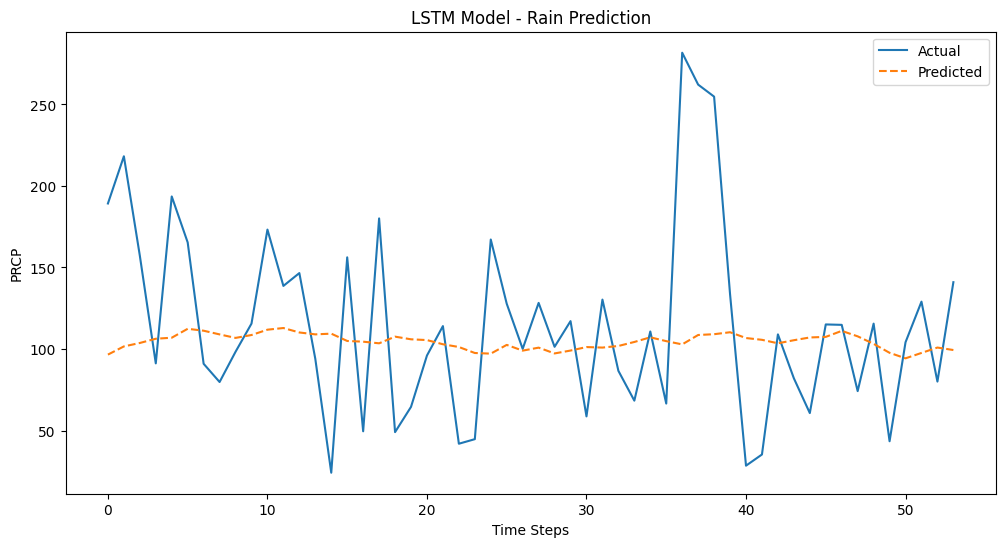

In [35]:
# Make predictions on the test set
y_pred = model_lstm.predict(X_test)


y_pred_original = y_pred * max_value  
y_test_original = y_test * max_value   

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted', linestyle='dashed')
plt.title('LSTM Model - Rain Prediction')
plt.xlabel('Time Steps')
plt.ylabel('PRCP')
plt.legend()
plt.show()


C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\1369126689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_rainfall['PRCP_normalized'] = (monthly_rainfall['PRCP'] - min_value) / (max_value - min_value)
C:\Users\crisd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step


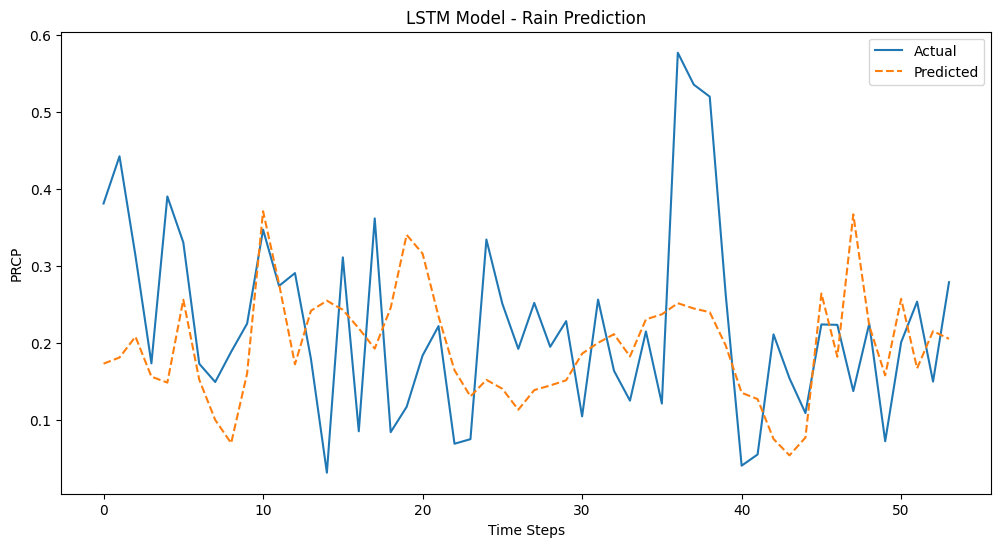

In [36]:
min_value = monthly_rainfall['PRCP'].min()
max_value = monthly_rainfall['PRCP'].max()

# Normalize the 'PRCP' column
monthly_rainfall['PRCP_normalized'] = (monthly_rainfall['PRCP'] - min_value) / (max_value - min_value)


data_normalized = monthly_rainfall[['DATE', 'PRCP_normalized']].values

# Create sequences for input (X) and target (y)
X, y = create_sequences(data_normalized, sequence_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], sequence_length, 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Determine n_steps and n_features based on the shape of the training data
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=500, verbose=0)

# Make predictions on the test set
y_pred = model_lstm.predict(X_test)

# Reshape the predictions and true labels to match their original shape
y_pred_original = y_pred * max_value  # If you normalized the 'PRCP' column
y_test_original = y_test * max_value   # If you normalized the 'PRCP' column

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted', linestyle='dashed')
plt.title('LSTM Model - Rain Prediction')
plt.xlabel('Time Steps')
plt.ylabel('PRCP')
plt.legend()
plt.show()

In [ ]:
#looks much better! Now let us look at the rain elevation over time for further analysis.

In [38]:
copy

,DATE,PRCP
0,1869-01-31,2.53
1,1869-02-28,6.87
2,1869-03-31,4.61
3,1869-04-30,1.39
4,1869-05-31,4.15
...,...,...
1843,2022-08-31,1.71
1844,2022-09-30,4.10
1845,2022-10-31,5.08
1846,2022-11-30,3.15


In [39]:
copy = copy[copy['DATE'].dt.year >= 2000]

In [40]:
copy

,DATE,PRCP
1572,2000-01-31,3.23
1573,2000-02-29,1.66
1574,2000-03-31,3.34
1575,2000-04-30,3.53
1576,2000-05-31,4.50
...,...,...
1843,2022-08-31,1.71
1844,2022-09-30,4.10
1845,2022-10-31,5.08
1846,2022-11-30,3.15


In [45]:
elevation

35.30291748046875

In [46]:
copy['Elevation Difference'] = copy['PRCP'] - elevation

C:\Users\crisd\AppData\Local\Temp\ipykernel_9504\3929381393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['Elevation Difference'] = copy['PRCP'] - elevation


In [47]:
copy

,DATE,PRCP,Elevation Difference
1572,2000-01-31,3.23,-32.072917
1573,2000-02-29,1.66,-33.642917
1574,2000-03-31,3.34,-31.962917
1575,2000-04-30,3.53,-31.772917
1576,2000-05-31,4.50,-30.802917
...,...,...,...
1843,2022-08-31,1.71,-33.592917
1844,2022-09-30,4.10,-31.202917
1845,2022-10-31,5.08,-30.222917
1846,2022-11-30,3.15,-32.152917


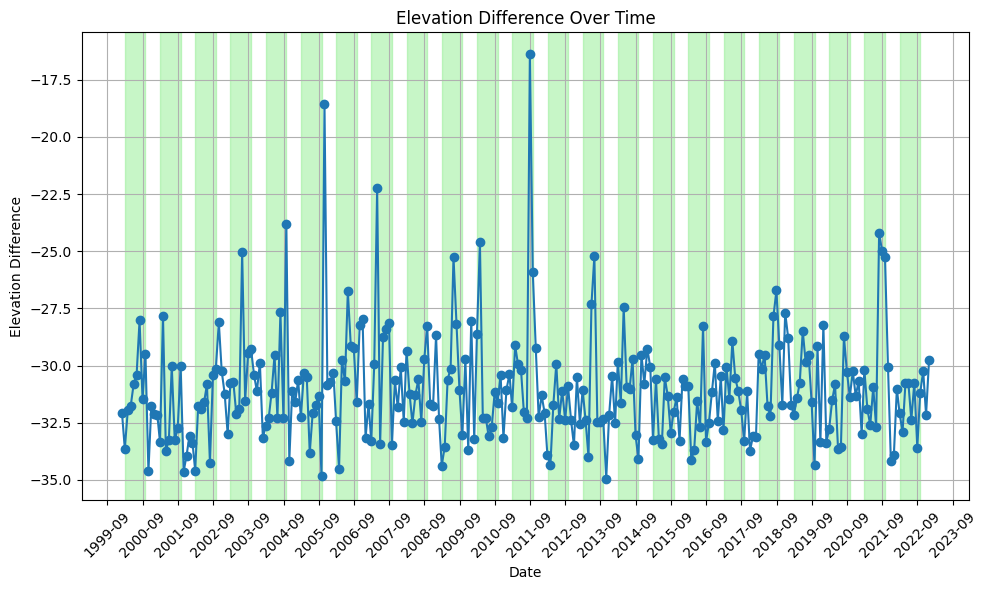

In [54]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(copy['DATE'], copy['Elevation Difference'], marker='o')

# Formatting x-axis in 6-month intervals
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=12))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

for year in copy['DATE'].dt.year.unique(): #The green shading represents the months of spring-summer
    spring_start = pd.Timestamp(f'{year}-03-01')
    spring_end = pd.Timestamp(f'{year}-09-30')
    plt.axvspan(spring_start, spring_end, color='lightgreen', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Elevation Difference')
plt.title('Elevation Difference Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#The green shading indicates seasons with high rainfall (spring to summer)